Sampling from a Population 
The law of averages also holds when the random sample is drawn from individuals in a large population.

As an example, we will study a population of flight delay times. The table united contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the Bureau of Transportation Statistics in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative; those flights left early.

In [7]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.ticker as tick

In [3]:
united=pd.read_csv("united_summer2015.csv")
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


One flight departed 16 minutes early, and one was 580 minutes late. The other delay times were almost all between -10 minutes and 200 minutes, as the histogram below shows.

In [5]:
united.Delay.min()

-16

In [6]:
united.Delay.max()

580

In [8]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)


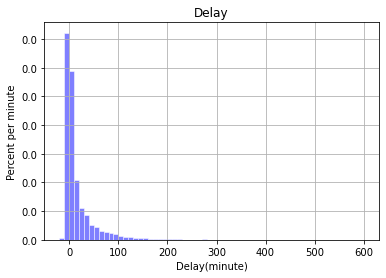

In [17]:
axarr=united.hist('Delay', bins = delay_bins, density=True, alpha=0.5, histtype='bar', ec='white',color='blue')
for ax in axarr.flatten():
        ax.set_xlabel("Delay(minute)")
        ax.set_ylabel("Percent per minute")
        ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x /(2* 1000)):.1f}'))

For the purposes of this section, it is enough to zoom in on the bulk of the data and ignore the 0.8% of flights that had delays of more than 200 minutes. This restriction is just for visual convenience; the table still retains all the data.

In [25]:
len(united[united['Delay'] > 200])/len(united)

0.008390596745027125

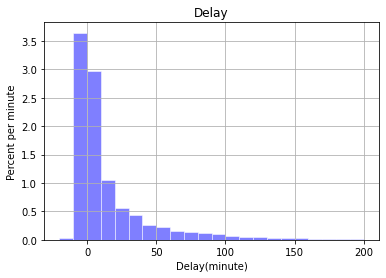

In [31]:
delay_bins = np.arange(-20, 201, 10)
axarr=united.hist('Delay', bins = delay_bins, density=True, alpha=0.5, histtype='bar', ec='white',color='blue')
for ax in axarr.flatten():
        ax.set_xlabel("Delay(minute)")
        ax.set_ylabel("Percent per minute")
        ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x*100 ):.1f}'))

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows:

In [45]:
len(united)

13825

In [32]:
len(united[(united['Delay'] >= 0) & (united['Delay'] < 10)])/len(united)

0.2935985533453888

Empirical Distribution of the Sample 
Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. It is helpful to package our code into a function. The function empirical_hist_delay takes the sample size as its argument and draws an empiricial histogram of the results.

In [60]:
def empirical_hist_delay(n):
          delay_bins = np.arange(-20, 201, 10)
          axarr=united.hist('Delay', bins = delay_bins, density=True, alpha=0.5, histtype='bar', ec='white',color='blue')
          for ax in axarr.flatten():
                ax.set_xlabel("Delay(minute)")
                ax.set_ylabel("Percent per minute")
                ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x*100):.1f}'))

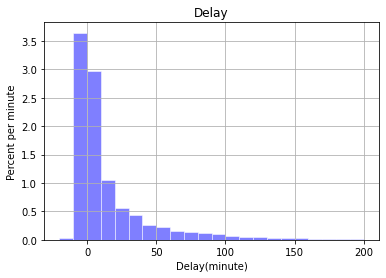

In [61]:
empirical_hist_delay(10)

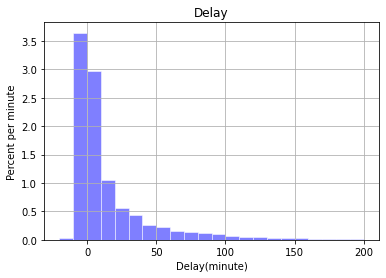

In [62]:
empirical_hist_delay(100)

The most consistently visible discrepancies are among the values that are rare in the population. In our example, those values are in the the right hand tail of the distribution. But as the sample size increases, even those values begin to appear in the sample in roughly the correct proportions.

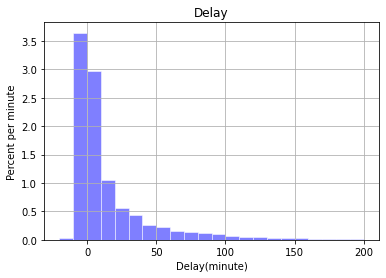

In [63]:
empirical_hist_delay(1000)

Convergence of the Empirical Histogram of the Sample 
What we have observed in this section can be summarized as follows:

For a large random sample, the empirical histogram of the sample resembles the histogram of the population, with high probability.

This justifies the use of large random samples in statistical inference. The idea is that since a large random sample is likely to resemble the population from which it is drawn, quantities computed from the values in the sample are likely to be close to the corresponding quantities in the population.